In [1]:
import requests
import datetime
import pytz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
api = "xxxxx"
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Fetch values of latitude and longitude
lat = "59.33258"
lon = "18.0649"
#Fetch the destination arrival datetime (milliseconds)
a= 1634735420

In [3]:
part = ''
url = f'https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&exclude={part}&appid={api}'
req = requests.get(url)
data = req.json()
print(data)
#print(url)

{'lat': 59.3326, 'lon': 18.0649, 'timezone': 'Europe/Stockholm', 'timezone_offset': 7200, 'current': {'dt': 1634840566, 'sunrise': 1634794795, 'sunset': 1634829869, 'temp': 281.13, 'feels_like': 277.59, 'pressure': 970, 'humidity': 91, 'dew_point': 279.75, 'uvi': 0, 'clouds': 75, 'visibility': 10000, 'wind_speed': 6.69, 'wind_deg': 280, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]}, 'minutely': [{'dt': 1634840580, 'precipitation': 0}, {'dt': 1634840640, 'precipitation': 0}, {'dt': 1634840700, 'precipitation': 0}, {'dt': 1634840760, 'precipitation': 0}, {'dt': 1634840820, 'precipitation': 0}, {'dt': 1634840880, 'precipitation': 0}, {'dt': 1634840940, 'precipitation': 0}, {'dt': 1634841000, 'precipitation': 0}, {'dt': 1634841060, 'precipitation': 0}, {'dt': 1634841120, 'precipitation': 0}, {'dt': 1634841180, 'precipitation': 0}, {'dt': 1634841240, 'precipitation': 0}, {'dt': 1634841300, 'precipitation': 0}, {'dt': 1634841360, 'precipitation': 

In [4]:
def fun(data):
    if 'dt' in data:
        yield data['dt']
    for k in data:
        if isinstance(data[k], list):
            for i in data[k]:
                for j in fun(i):
                    yield j
values = list(fun(data))

In [5]:
def get_date(timezone_offset):
    tz = datetime.timezone(datetime.timedelta(seconds=int(timezone_offset)))
    return datetime.datetime.now(tz = tz).strftime("%m/%d/%Y, %H:%M:%S") 
#strftime is just for visually formatting the datetime object
print('Time now: ',get_date(data['timezone_offset']))

Time now:  10/21/2021, 08:29:20


In [6]:
hourly = data["hourly"]
for entry in hourly:
    dt = datetime.datetime.fromtimestamp(entry["dt"], pytz.timezone('Europe/Vienna'))
    temp = entry["temp"]
    
for element in hourly:
    if element['dt']==a: print (element)
    else: element['dt']==min(values, key=lambda v: abs(a-v))
#print(element)

In [7]:
d = (element['weather'][0]['icon'])
icon = f'http://openweathermap.org/img/wn/{d}@2x.png'
img = mpimg.imread(icon)

Weather Report:	 2021-10-20 15:10:20


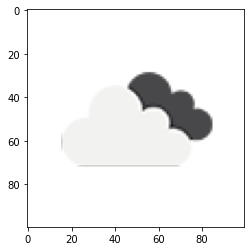

Europe/Stockholm Weather Forecast
Temperature:	 1.54 °C
Feels Like:	 -3.55 °C
Humidity:	 80 hPa
Wind speed:	 6.12 km/hr
Atmosphere:	 overcast clouds


In [8]:
print('Weather Report:\t', datetime.datetime.fromtimestamp(a))
plt.imshow(img)
plt.show()
print(data["timezone"], 'Weather Forecast')
print('Temperature:\t', round(element['temp']-273.15, 2), '\u00b0C')
print('Feels Like:\t', round(element['feels_like']-273.15, 2), '\u00b0C')
print('Humidity:\t', round(element['humidity'], 2), 'hPa')
print('Wind speed:\t', round(element['wind_speed'], 2), 'km/hr')
print('Atmosphere:\t', (element['weather'][0]['description']))